# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* `ID`: ID of the lead
* `age`: Age of the lead
* `current_occupation`: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* `first_interaction`: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* `profile_completed`: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* `website_visits`: How many times has a lead visited the website
* `time_spent_on_website`: Total time spent on the website
* `page_views_per_visit`: Average number of pages on the website viewed during the visits.
* `last_activity`: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* `print_media_type1`: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* `print_media_type2`: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* `digital_media`: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* `educational_channels`: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* `referral`: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* `status`: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Great Learnings/ExtraaLearn.csv')

## **Data Overview**
- Check whether the dataset has been loaded properly or not, we will use the *head()* and *tail()* methods from Pandas to do this.
- Get information about the number of rows and columns in the dataset: *Shape*.
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected: *Data type*.
- Check the number of *unique values* in each column
- Check the *statistical summary* of the dataset to get an overview of the numerical columns of the data.
-Check the *count of each unique category* in each of the categorical variables.
- Study *missing value* and *duplicated values*.

### Displaying the first and last few rows of the dataset in order to understand its structure a little better.

In [ ]:
# let's view the first 5 rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### Checking the shape of the dataset

In [ ]:
# Understand the shape of the data
data.shape

(4612, 15)

- The dataset has **4612 rows and 15 columns.**

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- Out of the 15 features, 10 are categorical variables (type object).
- Only `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit` are numerical features
- `status`: is a binary categorical variable and the variable of interest in this study (target).
- The number of non-null values is the same as the total number of entries in the data (4,612), which implies there are no null values.

### Check the number of unique values in each column

In [ ]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

- *ID* has 4612 unique values
- There are 46 distinct *ages* represented in the dataset for the leads.
- The columns `current_occupation`, `profile_completed ` and `last_activity ` have 3 unique values.
- The number of unique values for both `time_spent_on_website` and `page_views_per_visit` is quite high, suggesting that the total time spent on the website by the leads varies significantly from one lead to another, as does the average number of pages viewed during their visits

### Statistical summary of the dataset

In [ ]:
# Statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [ ]:
data.status.value_counts()

0    3235
1    1377
Name: status, dtype: int64

The satistical summary for the numerical variables:

- The Edtech company's leads have an average age of 46 years, with ages ranging from a minimum of 18 years to a maximum of 63 years. Additionally, 75% of these leads are aged 57 years or younger.

- The website visits range from 0 to a maximum of 30 times. Specifically, 25% of leads have visited the website two times or less, 50% have visited three times or fewer, and 75% have visited five times or fewer. Although the majority of values are concentrated below five visits, there is a wide range due to the maximum of 30 visits. In future analyses, it will be important to assess the presence of outliers in this feature.

- The average time spent on the website is 724 seconds, while the median time is 376 seconds. This median value indicates that 50% of leads spend 376 seconds or less on the website. The higher mean compared to the median suggests the influence of outliers, which will be thoroughly examined in future analyses.

- The average number of pages viewed during website visits is 3 pages. However, similar to the time_spent_on_website variable, the range of this variable is notably wide. Approximately 75% of leads typically visit 4 pages or fewer on average, yet the maximum number of pages visited can reach as high as 18.

- Status is a binary feature that takes values: 0 or 1. 3235 observations are non paid customers (no conversion) and 1377 paid customers (did buy an online class).

### Printing the number of occurrences of each unique value in each categorical column

In [ ]:
# Create a list of the categorical features
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

# Printing number of count of each unique value in each column
for categorical in cat_cols:
  print(data[categorical].value_counts(1)) #proportion
  print('-'*50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 


- The 'ID' column serves as a unique identifier for each lead within the dataset, containing a total of 4,612 distinct values. However, for our analysis, this column does not provide relevant information and will be removed during the preprocessing stage.

- Most of the leads obtained by the Edtech company, accounting for approximately 57%, fall into the 'Professional' category. Around 31% are categorized as 'Unemployed,' and the remaining 12% are classified as 'Students.' This data indicates that the primary audience seeking online education consists of professionals.

- The initial interaction with ExtraaLearn shows that 55% of leads used the 'Website,' while 45% chose the 'Mobile App.'

- Approximately half of the leads have completed a substantial portion of their profile on the website/mobile app, categorizing them as having a high profile. The remaining half falls into the medium profile category. Only a small fraction, specifically 2% of the leads, have a low-profile completion.

- The most common mode of last interaction between leads and ExtraaLearn is via Email, accounting for 49% of interactions. Following that, Phone Activity is the second most frequent interaction method, at 27%, while Website Activity constitutes the remaining 24%. Almost all leads prefer to receive program details through email, with a smaller percentage opting for a Phone Conversation with a representative, and even fewer engaging in live chat interactions with representatives.

- A total of 89% of leads have not encountered ExtraaLearn's advertisement in the newspaper.

- The advertisement of ExtraaLearn in magazines has not been seen by 95% of the leads.

- A total of 11% of leads have come across ExtraaLearn's advertisement on digital platforms.

-  85%, have not come across ExtraaLearn through education channels, including online forums, discussion threads, educational websites, etc.

- 98% of leads have not been introduced to ExtraaLearn through referrals.






### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

- Data has no duplicate rows.

### Checking for missing values

In [ ]:
data.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

- The data has no missing values.

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate analysis

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(10, 6), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

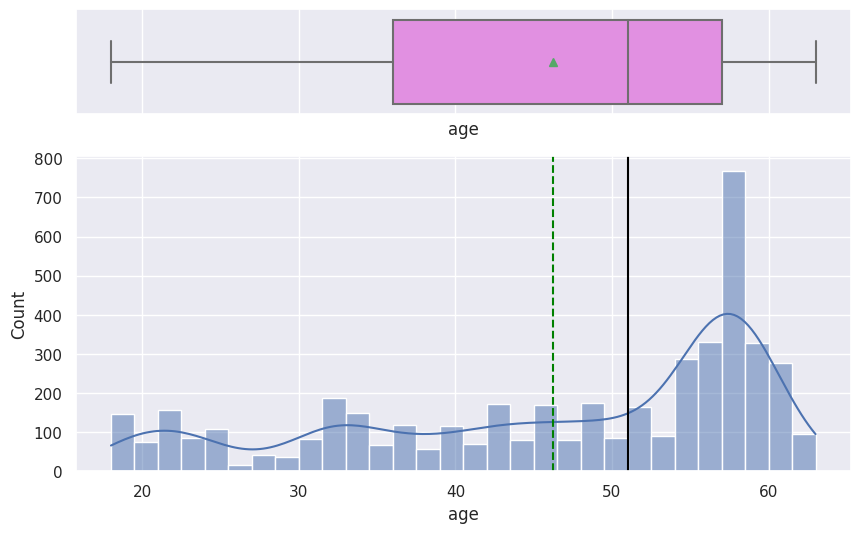

In [ ]:
histogram_boxplot(data, "age", kde = True, bins = 30)

- The distribution's peak indicates that the majority of leads fall within the age range of 50 to 60 years old. This aligns with the fact that the vast majority of leads (50%) seeking online education are professionals.

- The age distribution of the leads is left-skewed and does not exhibit any outliers.

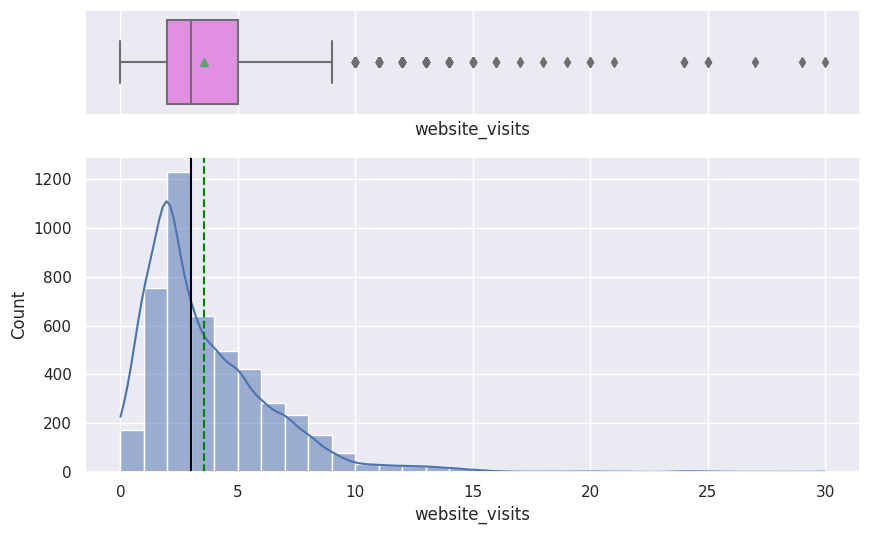

In [ ]:
histogram_boxplot(data, "website_visits", kde = True, bins = 30)

- Most of the values cluster below five visits, with a mean of 4, suggesting that, on average, leads visit the website around four times.

- The distribution of website visits is highly skewed towards the right and presents outliers (boxplot).

In [ ]:
#Let's check how many such extreme values are there.
data[data['website_visits']>15]
n_extreme_values= len(data[data['website_visits']>15].index)
percentage= round(n_extreme_values/data.shape[0],4)*100
print("In total there are:",n_extreme_values, "extreme values")
print(percentage)

In total there are: 17 extreme values
0.37


- We can see that there are 17 observations which can be considered as outliers (around 4% of the data).

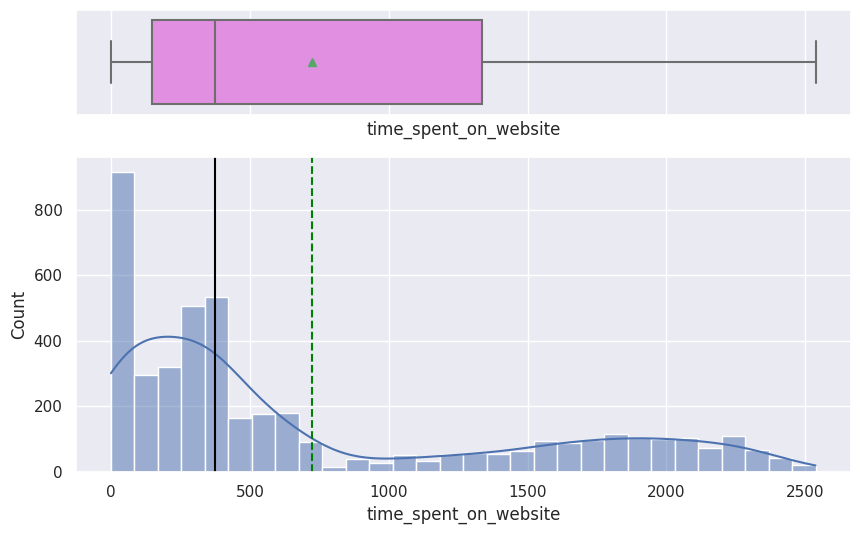

In [ ]:
histogram_boxplot(data, "time_spent_on_website", kde = True, bins = 30)

- The cumulative time spent on the website spans from 0 to 2500 seconds. The average total time spent on the website is 724 seconds, with a median of 376 seconds.

- The distribution of time spent on the website by leads exhibits a broad range of values and a slight rightward skew, but it does not include any outliers.


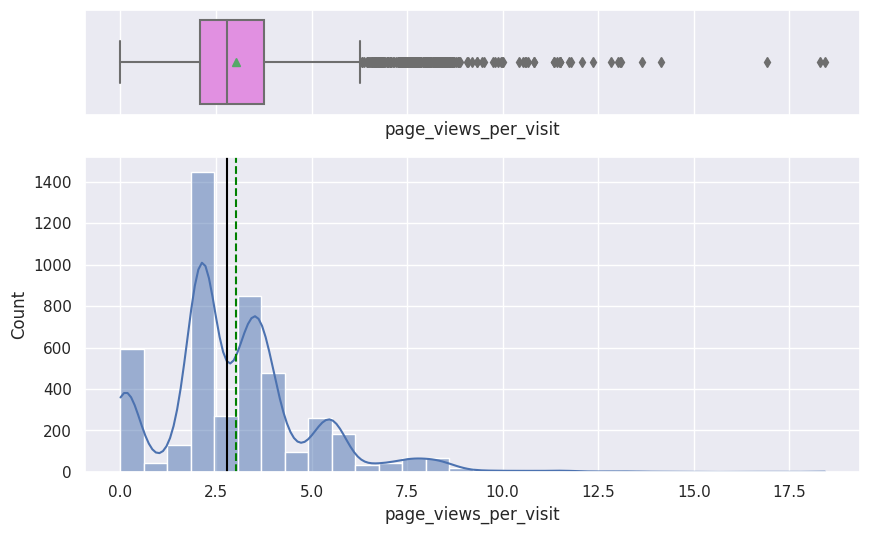

In [ ]:
histogram_boxplot(data, "page_views_per_visit", kde = True, bins = 30)

- The distribution of page views per visit is right-skewed.The number of pages for most leads  viewed during the visits is less than 5 pages.

- There are some observations that can be considered as outliers as they are very far from the upper whisker in the boxplot. Let's check how many such extreme values are there.

In [ ]:
#Let's check how many such extreme values are there
len(data[data['page_views_per_visit']>10.0])

27

 27 observations can be considered as outliers (around 6% of the data).

In [ ]:
n_out= round(len(data[data['page_views_per_visit']>10.0])/data.shape[0],4)*100
print("outliers represent", n_out, "% of the data")

outliers represent 0.59 % of the data


In [ ]:
#to see those observations
data[data['page_views_per_visit']>10.0]

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,EXT033,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
227,EXT228,48,Unemployed,Website,Medium,2,1942,13.076,Phone Activity,No,No,No,Yes,No,0
268,EXT269,57,Professional,Mobile App,Medium,3,1009,18.302,Phone Activity,No,No,No,No,No,0
1119,EXT1120,25,Professional,Mobile App,Medium,1,1240,11.739,Website Activity,No,No,No,No,No,0
1430,EXT1431,19,Student,Mobile App,Medium,4,2292,10.584,Website Activity,No,No,No,No,No,0
1750,EXT1751,59,Professional,Website,High,3,369,10.670,Website Activity,No,No,No,No,No,0
1753,EXT1754,20,Student,Mobile App,High,5,721,10.808,Email Activity,No,No,No,No,No,1
1999,EXT2000,20,Student,Mobile App,High,1,78,12.357,Website Activity,No,No,No,No,Yes,0
2167,EXT2168,58,Unemployed,Website,High,2,2066,11.506,Email Activity,No,No,Yes,No,No,1


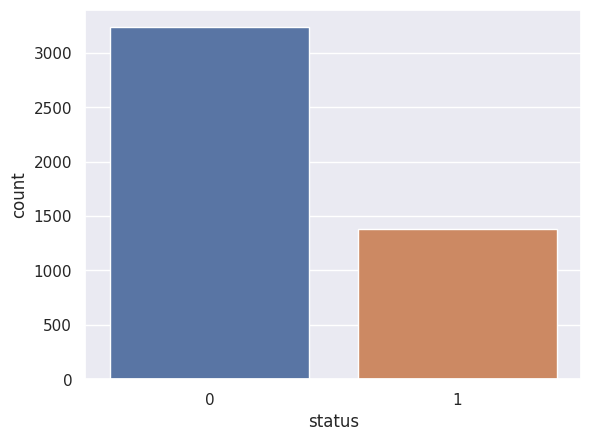

In [ ]:
sns.countplot(x = data['status'])
plt.show()

- 30% of the leads successfully converted into paying customers, while the remaining 70% did not. The status distribution is imbalanced, and this imbalance must be taken into account when performing classification tasks.



In [ ]:
data['status'].value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

**Let's understand the distribution of the categorical variables**

In [ ]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 3))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()

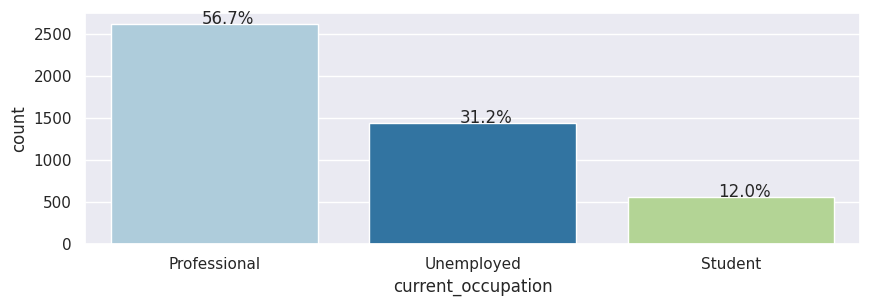

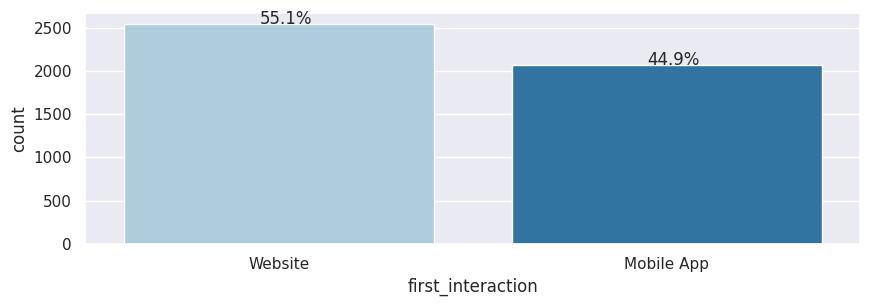

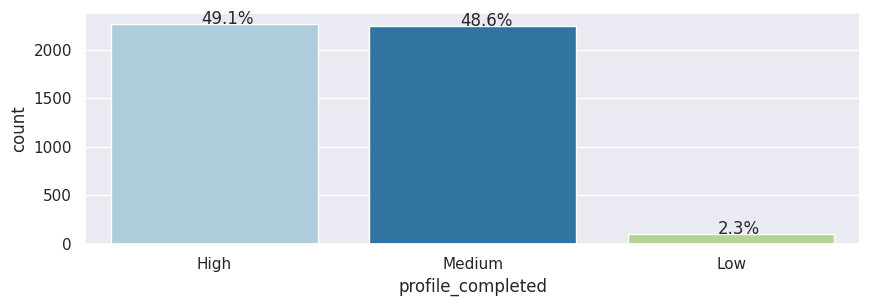

In [ ]:
bar_perc(data, 'current_occupation')
bar_perc(data, 'first_interaction')
bar_perc(data, 'profile_completed')

- As previously mentioned, the vast majority of leads are professionals.
- The most frequent point of interaction occurs through the website (55.1%). - Nearly all leads have completed their profile with either a "high" or "medium" level of information.
This study focuses solely on three categorical features, as we have already analyzed categorical variables in the previous section.

### Bivariate analysis

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

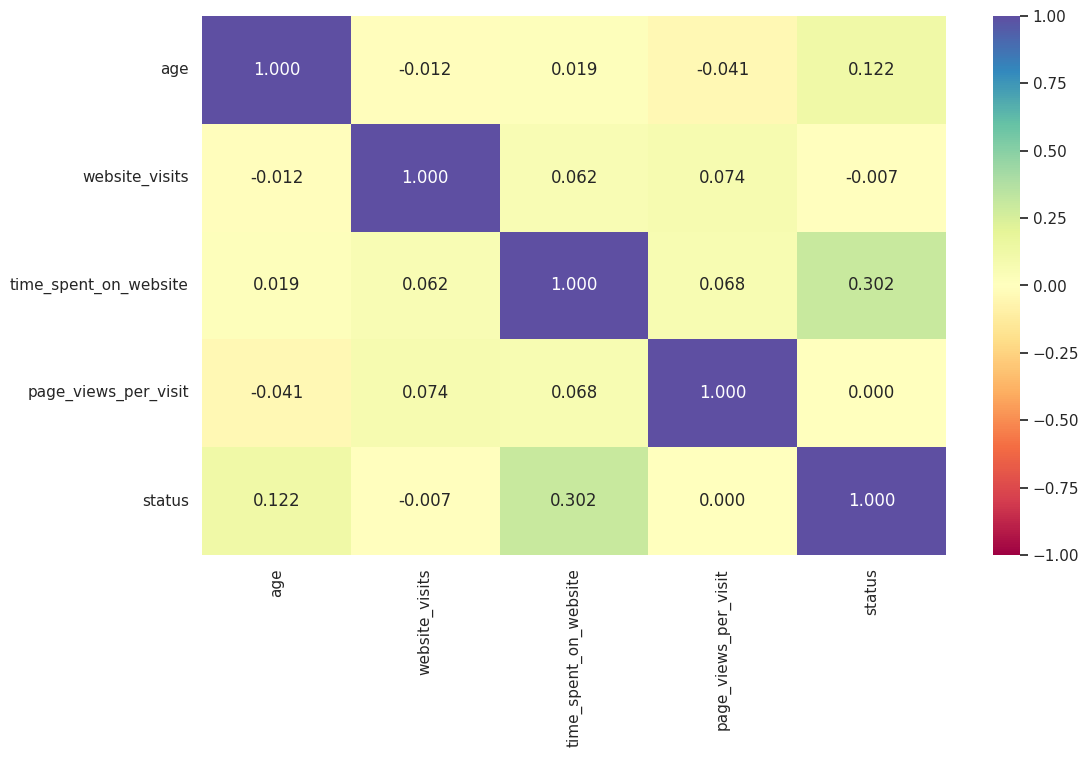

In [ ]:
#Selecting numerical variables to calculate the correlation
cols_list= data.select_dtypes(include=np.number).columns.tolist()
cols_list

plt.figure(figsize=(12,7))
sns.heatmap(data[cols_list].corr(), annot=True, fmt='.3f', cmap='Spectral', vmin=-1, vmax=1) #vmin and vmax so that the range goes between -1 to 1
plt.show()

- Many of the variables exhibit weak correlations with each other. However, the most notable **correlation is observed between the "status" and "time spent on the website"**. This correlation is moderate, with a coefficient of 0.3, and it is positive in nature. This positive correlation implies that as the time spent on the website increases, the likelihood of a lead being converted to a paid customer (status = 1) also increases.
- The number of pages visited by a lead shows no correlation with their status. This implies that the number of pages a lead visits does not influence whether or not they will convert.

In [ ]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

**` 1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status. `**


status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


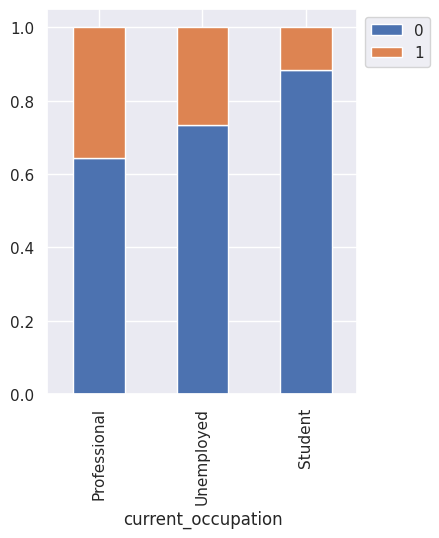

In [ ]:
stacked_barplot(data,'current_occupation','status')

- We can clearly see that one's **current occupation significantly influences their likelihood of participating in the program**. Specifically, **professionals exhibit a higher tendency to invest in online education**, with 35% of professionals choosing to pay for it. In contrast, the conversion rate for unemployed individuals stands at 30%, while students have a lower conversion rate of 10%, both of which are lower than that of professionals.

**`2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?`**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


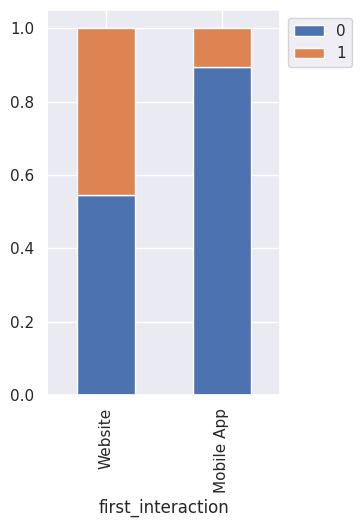

In [ ]:
stacked_barplot(data, "first_interaction", "status")

- The initial interaction channels do have an impact on 'status.' **Leads whose first interaction was through the website are more likely to convert** (i.e., pay for an online course) with a conversion rate of 0.65, compared to those whose first interaction is through the mobile app (0.9).

**`3. The company uses multiple modes to interact with prospects. Which way of interaction works best?`**

In [ ]:
crosstab = pd.crosstab(data['last_activity'], data['status'], normalize='all')
crosstab

status,0,1
last_activity,,
Email Activity,0.344102,0.149827
Phone Activity,0.210538,0.057025
Website Activity,0.146791,0.091717


- To analyze which interaction methods yield the best results, we employ a cross-tabulation involving the `last activity` and `status`` features. The most successful interaction methods are characterized by higher conversion rates. When we focus on the 'status=1' column, we find that the highest proportion of leads who successfully converted engaged through email (0.14). Following closely, we have website interactions (0.09), and lastly, phone activity (0.05).
-**Leads whose last interaction was through email have a higher conversion rate.**

**`4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?`**

In [ ]:
# Filter the dataset to include only rows where 'status' is equal to 1 (successful conversions)
converted_leads = data[data['status'] == 1]

# Calculate conversion rates for each channel
conversion_rates_print_media_type1 = len(converted_leads[converted_leads['print_media_type1'] == 'Yes']) / len(converted_leads)
conversion_rates_print_media_type2 = len(converted_leads[converted_leads['print_media_type2'] == 'Yes']) / len(converted_leads)
conversion_rates_digital_media = len(converted_leads[converted_leads['digital_media'] == 'Yes']) / len(converted_leads)
conversion_rates_educational_channels = len(converted_leads[converted_leads['educational_channels'] == 'Yes']) / len(converted_leads)
conversion_rates_referral = len(converted_leads[converted_leads['referral'] == 'Yes']) / len(converted_leads)

# Create a dictionary to store the conversion rates for each channel with their names
conversion_rates_channels = {
    'print_media_type1': conversion_rates_print_media_type1,
    'print_media_type2': conversion_rates_print_media_type2,
    'digital_media': conversion_rates_digital_media,
    'educational_channels': conversion_rates_educational_channels,
    'referral': conversion_rates_referral
}

# Find the channel with the highest conversion rate
highest_conversion_channel = max(conversion_rates_channels, key=conversion_rates_channels.get)

# Print the channel with the highest conversion rate
print(f"The channel with the highest conversion rate is '{highest_conversion_channel}' with a conversion rate of {conversion_rates_channels[highest_conversion_channel]:.2%}")


The channel with the highest conversion rate is 'educational_channels' with a conversion rate of 14.31%


In [ ]:
conversion_rates_channels

{'print_media_type1': 0.11546840958605664,
 'print_media_type2': 0.054466230936819175,
 'digital_media': 0.12200435729847495,
 'educational_channels': 0.1430646332607117,
 'referral': 0.0457516339869281}

**The channel with the highest conversion rate is `educational_channels`**, then `digital_media`, `print_media_type1` , `print_media_type2` and lastly `referral`.

**`5.People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?`**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


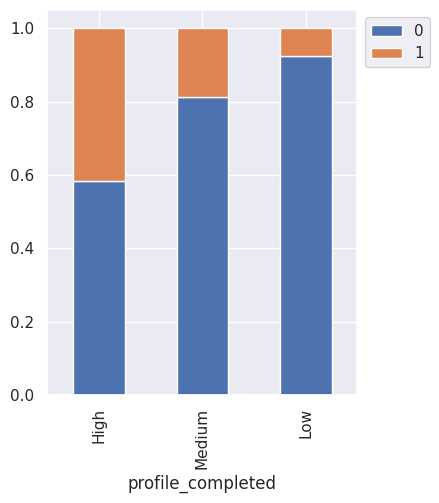

In [ ]:
stacked_barplot(data, "profile_completed", "status")

- **Leads who completed their profiles to a high degree have a greater likelihood of converting**. Specifically, 61% of leads with highly completed profiles chose to invest in online education. In contrast, among those with moderately completed profiles, only 20% converted, and for those with low completion levels, the conversion rate was merely 10%.

**`6. Other analysis: Age and status`**

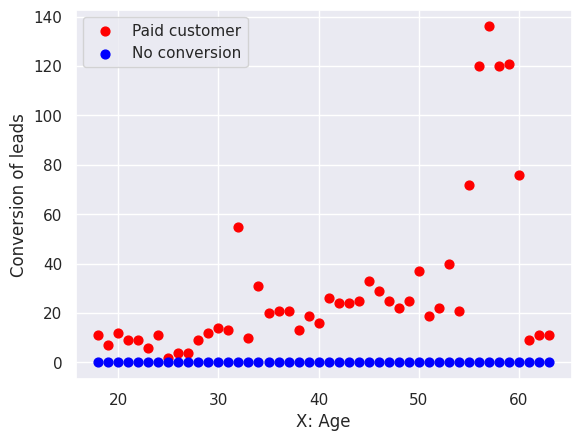

In [ ]:
# We will be using the Matplotlib library for plotting.

# subsetting the data
paidcustomer = data.loc[(data.status == 1)]
no_paidcustomer	= data.loc[(data.status == 0)]

# frequencies
paidcustomer_freq = paidcustomer.age.value_counts() #failures.groupby('X')
no_paidcustomer_freq = no_paidcustomer.age.value_counts()

plt.scatter(paidcustomer_freq.index, paidcustomer_freq, c='red', s=40)
plt.scatter(no_paidcustomer_freq.index, np.zeros(len(no_paidcustomer_freq)), c='blue', s=40)
plt.xlabel('X: Age')
plt.ylabel('Conversion of leads')
plt.legend(['Paid customer', 'No conversion'])
plt.show()

- We haven't detected any significant correlation between age and the probability of conversion. What we've noticed is that regardless of age, a considerable number of leads do not convert, indicating a lack of interest in purchasing online education.
- Additionally, when examining the graph, it becomes evident that individuals aged between 50 and 60 exhibit the highest conversion rates. This observation aligns with our previous research, where we established that professionals are the ones showing interest in online education.

## Data Preprocessing

In [ ]:
# Creating the copy of the dataframe
df = data.copy()

**Dropping the unique values column**

In [ ]:
# Dropping CustomerID column
df.drop(columns='ID',inplace=True)

**Removing outliers.**

In [ ]:
# Dropping observations with page_views_per_visit greater than 12. There are 11 such observations
df.drop(index=df[df['page_views_per_visit']>10].index,inplace=True)

# Dropping observations with website_visits greater than 15. There are 17 such observations
df.drop(index=df[df['website_visits']>15].index,inplace=True)

**Creating dummy variables for the categorical columns**

In [ ]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'first_interaction','profile_completed', 'last_activity']

# Creating dummy variables
# drop_first=True is used to avoid redundant variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapping overtime and attrition
dict_print_media_type1 = {'Yes': 1, 'No':0}
dict_print_media_type2 = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}


df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
# Separating target variable and other variables
X=df.drop(columns='status', axis=1)
Y=df['status']

**Splitting the data into a 70% train and 30% test set**

In [ ]:
# Splitting the data into train and test sets
#train_test_split?
# shuffle: data will be shuffled before splitting, shuffling helps randomize the data and reduce any potential bias.
# stratify: Important for imbalanced datasets, stratified sampling ensures that the class distribution in the training and testing sets is similar to the original dataset.
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3, random_state=1, shuffle = True, stratify=Y)

- Tree based models such as Decision Trees and Random Forest does not require feature scaling to be performed as they are not sensitive to the variance in the data.
- No need for imputation on missing values (no nan).

**Metrics: Let's create a function to calculate the classification report and confusion matrix.**

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Conversion', 'Conversion'], yticklabels=['Not Conversion', 'Conversion'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

### First few rows of the dataset

In [ ]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,0,0,1
1,56,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1,0,1
2,52,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1,0,1
3,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,0,0,1
5,50,4,212,5.682,0,0,0,1,0,0,0,1,0,0,0,1,0


- Everything is in order; the 'id' column has been successfully dropped, and the creation of dummy variables has been executed correctly.

In [ ]:
print("Shape of Training set : ", df.shape)

Shape of Training set :  (4568, 17)


Let's confirm it makes sense:

In [ ]:
data.shape

(4612, 15)

In [ ]:
#number og observation eliminated in df
index1=len(data[data['page_views_per_visit']>10].index)
index2=len(data[data['website_visits']>15].index)

In [ ]:
data.shape[0]-index1-index2

4568

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3197, 16)
Shape of test set :  (1371, 16)


In [ ]:
#Observation to the training set
round(4584* (1-0.3),1)

3208.8

In [ ]:
df.columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'first_interaction_Website', 'profile_completed_Low',
       'profile_completed_Medium', 'last_activity_Phone Activity',
       'last_activity_Website Activity'],
      dtype='object')

## Building a Decision Tree model

- We will build our model using the DecisionTreeClassifier function.
- If the frequency of class 1 is 30% and the frequency of class 0 is 70%, then class 0 will become the dominant class and the decision tree will become biased toward the dominant class. To prevent this is use class_weight, a hyperparameter for the decision tree classifier where we specify the weight of each class.

In [ ]:
df.status.value_counts(normalize=True)

0    0.701839
1    0.298161
Name: status, dtype: float64

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.70, 1: 0.30}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       953

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197



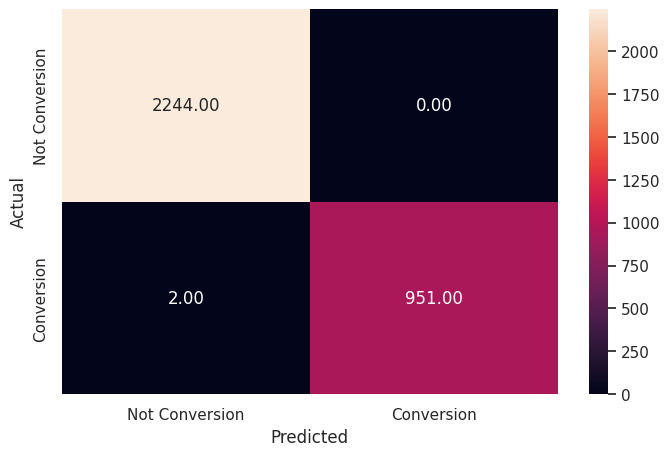

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       962
           1       0.65      0.67      0.66       409

    accuracy                           0.79      1371
   macro avg       0.75      0.76      0.75      1371
weighted avg       0.79      0.79      0.79      1371



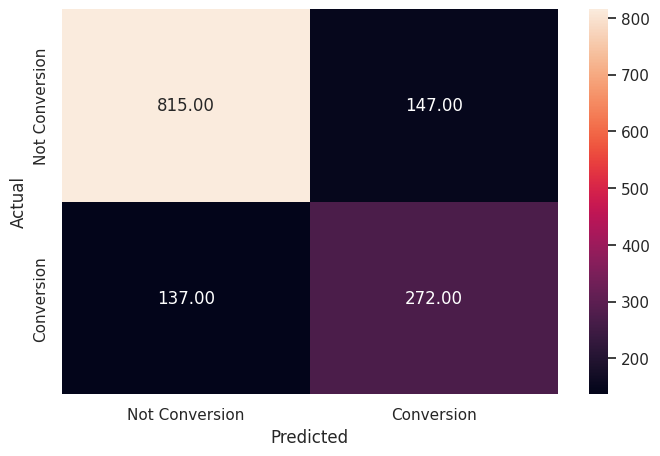

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree works well on the training data but not so well on the test data as the recall is 0.68 in comparison to 1 for the training dataset, i.e., the **Decision Tree is overfitting the training data**.
- The precision score on the test data indicates that there is a 34% (1 - 0.66) likelihood that the model may predict a lead will purchase an online course (convert), even when they will not.

**Let's plot the feature importance and check the most important features.**

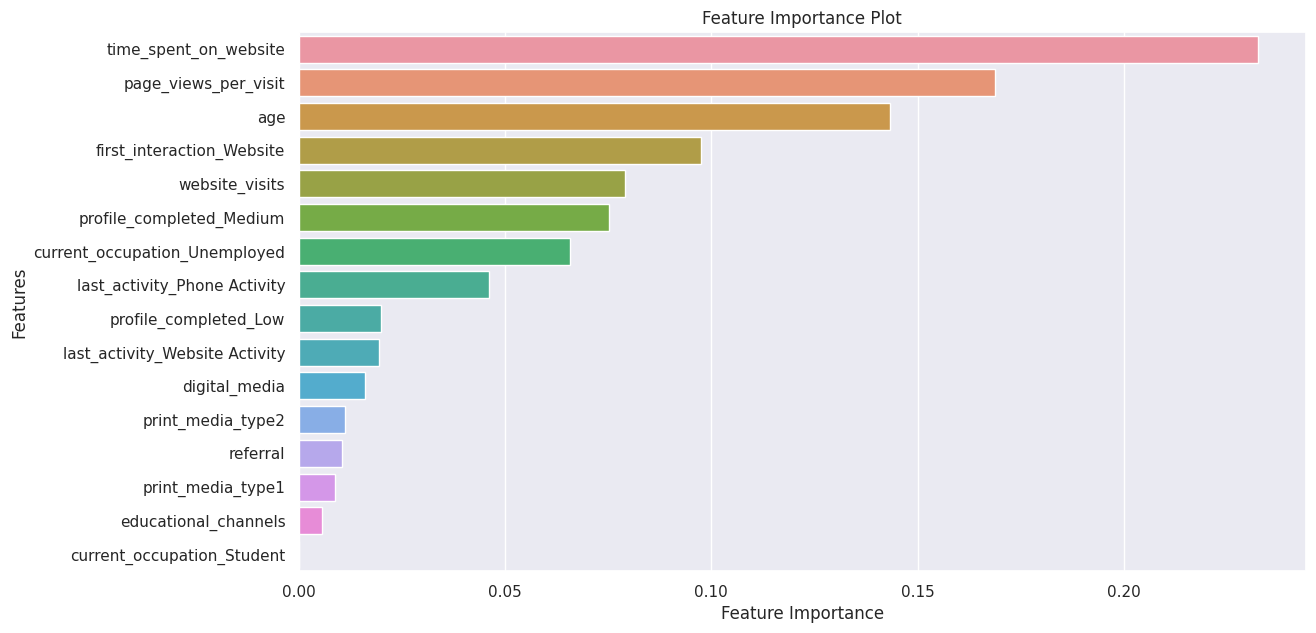

In [ ]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 7))

# Swap the order of arguments in the barplot function
sns.barplot(x=importance_df['Importance'], y=importance_df.index)

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


**Observations:**

- According to the Decision Tree, `time_spent_on_website` is the most important feature, followed by `first_interaction_website`, `page_views_per_visit`, `age`.

- `time_spent_on_website`: is considered the most important for making predictions. It suggests that the amount of time a lead spends on the website is a significant factor in determining whether they will pay for an online course (convert).

## Do we need to prune the tree?

**Observations:**
- Indeed, **pruning techniques are needed** to enhance the model's generalization. This stems from our observation of signs that the model is overfitting, demonstrating exceptional performance on the training data but not on the test data

Pruning a decision tree is a technique used to reduce its size and complexity by removing branches or nodes that do not provide significant predictive power or are overfitting the training data.

Steps: We need to define a Pruning Criterion:
- Maximum Depth: Limit the depth of the tree to prevent it from growing too deep.
- Minimum Number of Samples: Prune nodes if they have fewer than a certain number of training samples.
- Minimum Impurity Measures: such as Gini impurity or entropy.

To calculate wich is the best hyperparameter we will use Gris Search

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2244
           1       0.71      0.59      0.65       953

    accuracy                           0.81      3197
   macro avg       0.77      0.75      0.76      3197
weighted avg       0.80      0.81      0.80      3197



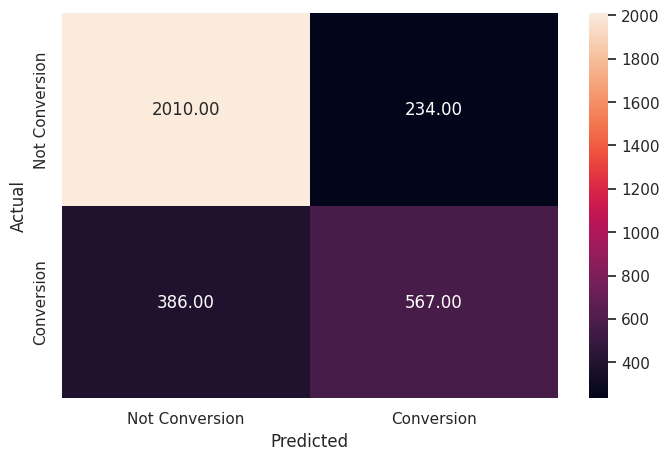

In [ ]:
from sklearn import metrics
from sklearn.metrics import make_scorer, recall_score

# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- Compared to the model using default hyperparameter values, there has been a  decrease in performance on the training set. This outcome is in line with our objective of mitigating overfitting.
- Out of all the leads that actually converted (status=1), the model successfully detected 59% of them. This means that the model has a challenging time identifying true leads who ended up paying for online education.


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       962
           1       0.66      0.54      0.60       409

    accuracy                           0.78      1371
   macro avg       0.74      0.71      0.72      1371
weighted avg       0.77      0.78      0.77      1371



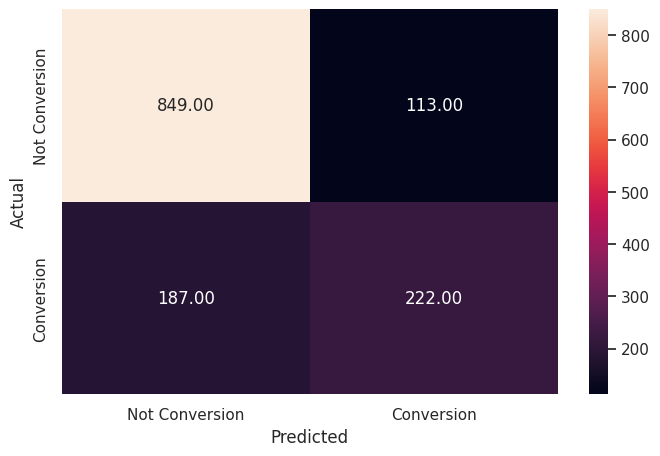

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- This model is not overfitting the training data and gives approximately the same result on the test and train datasets.
- Precision has gone down from .71 to .66 in comparison to the previous model which means the tuned model will give a high number of false positives.
- The model's ability to capture a higher proportion of true conversions has to improve, as it is currently missing about 46% of them. recall(0.53)


**Let's look at the feature importance of this model and try to analyze why this is happening.**

<Axes: xlabel='Importance'>

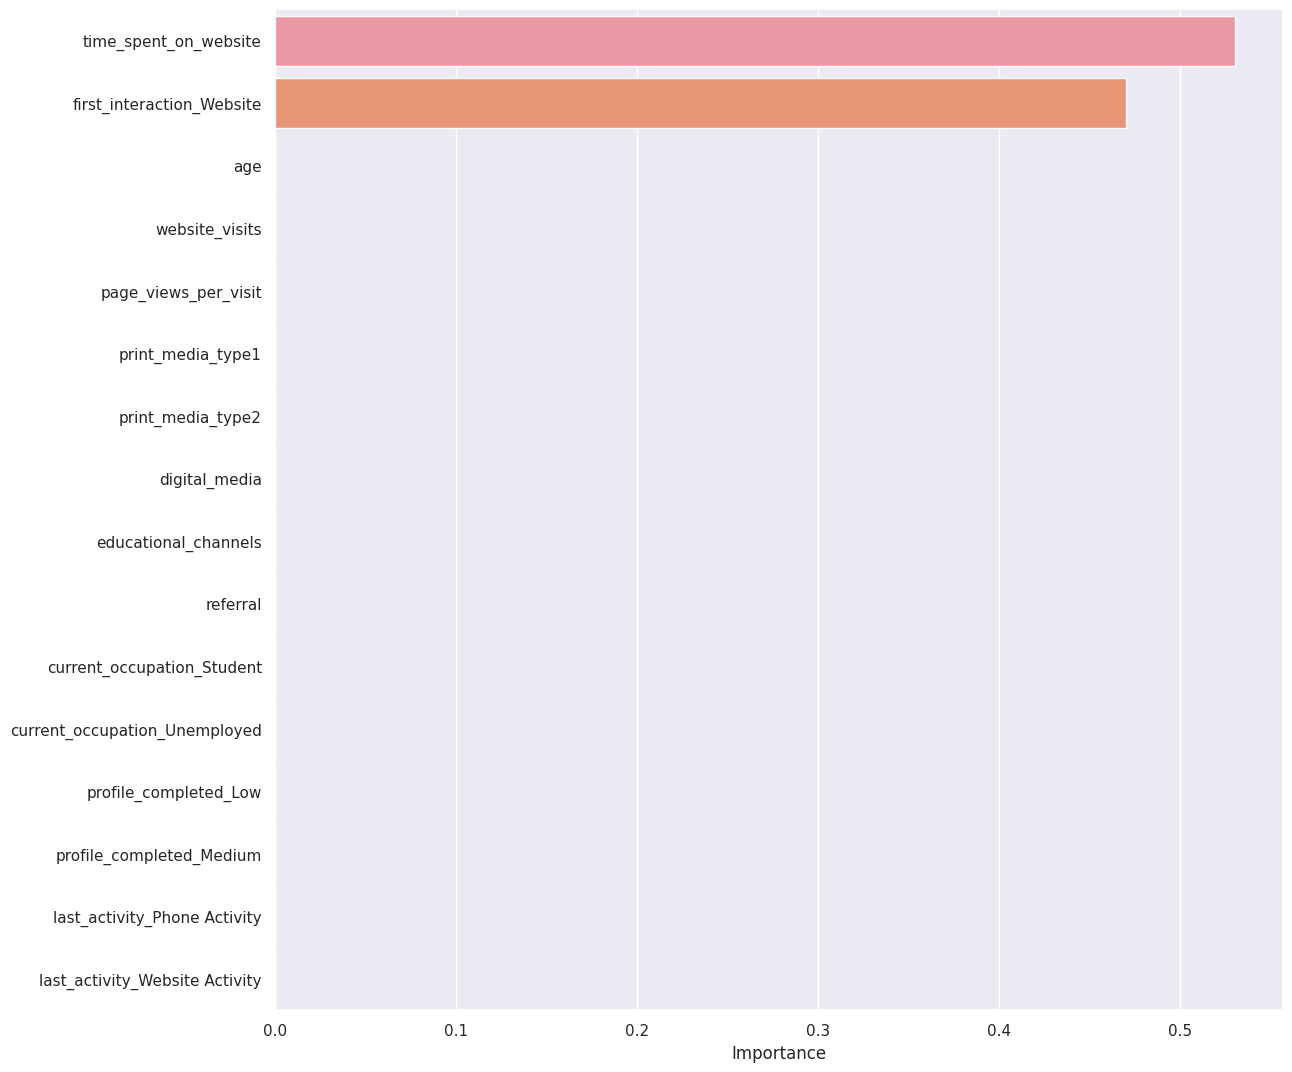

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

- After tuning the model, we found out that only 1 features is important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.70, 1: 0.30}, random_state = 1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2251
           1       1.00      1.00      1.00       957

    accuracy                           1.00      3208
   macro avg       1.00      1.00      1.00      3208
weighted avg       1.00      1.00      1.00      3208



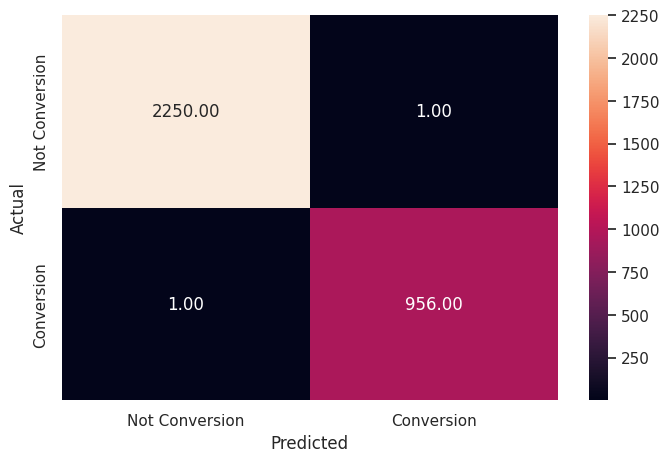

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

**Observation:**

For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       965
           1       0.77      0.71      0.74       411

    accuracy                           0.85      1376
   macro avg       0.83      0.81      0.82      1376
weighted avg       0.85      0.85      0.85      1376



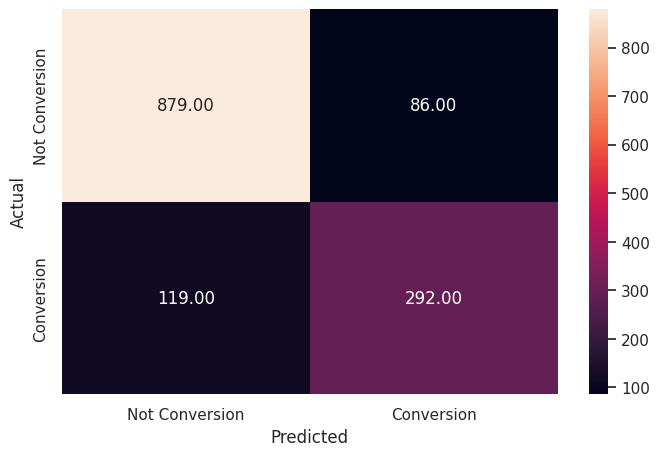

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.71 for class 1.
- Precision is low for the test data compared to the training data.

**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance'>

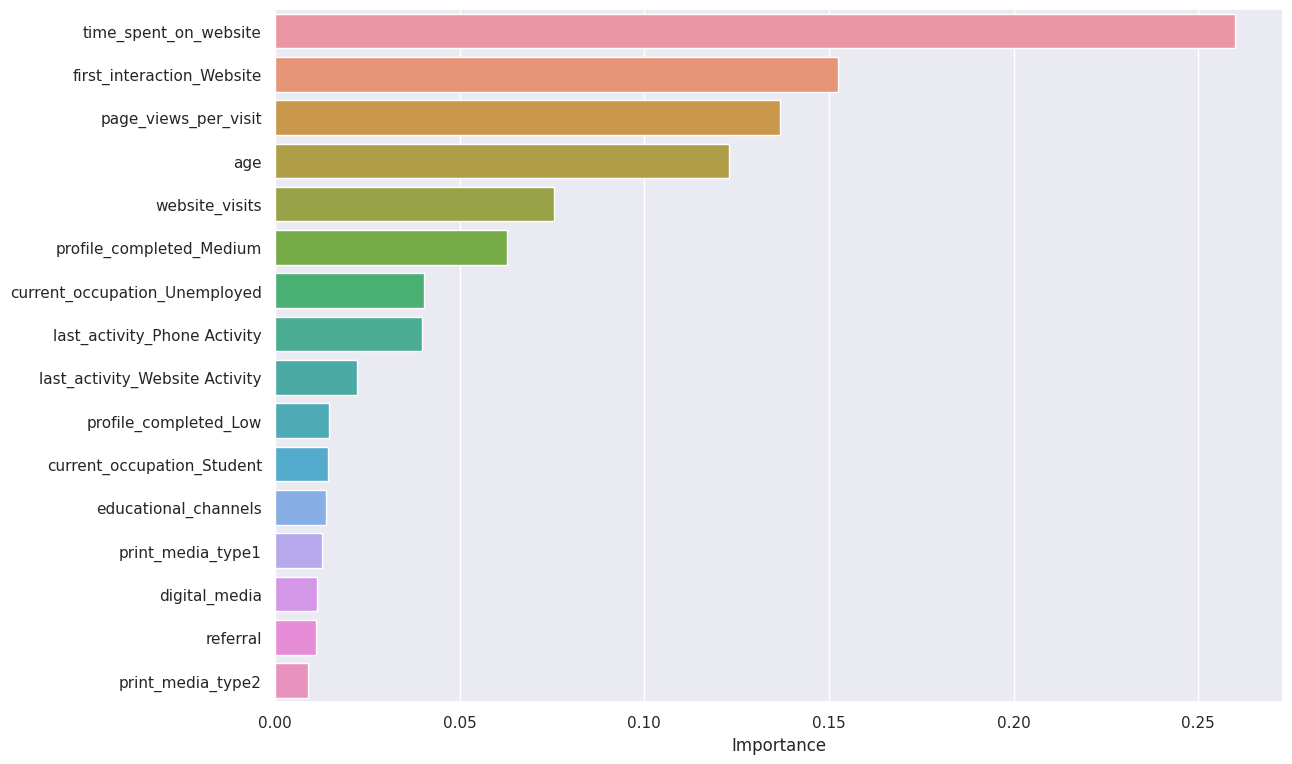

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 9))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**
- According to the Random Forest, the four  most important features are the same as the Decidion Tree: `time_spent_on_website` is the most important feature, followed by `first_interaction_website`, `page_views_per_visit` and `age` .

## Do we need to prune the tree?

- **Given the presence of overfitting in both the decision tree and random forest models, it becomes necessary to apply pruning techniques** to improve the model's generalization ability. This decision is based on our observation that the models exhibit signs of overfitting, as they perform exceptionally well on the training data but fail to generalize effectively to the test data.

n_estimators: The number of trees in the forest.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       953

    accuracy                           1.00      3197
   macro avg       1.00      1.00      1.00      3197
weighted avg       1.00      1.00      1.00      3197



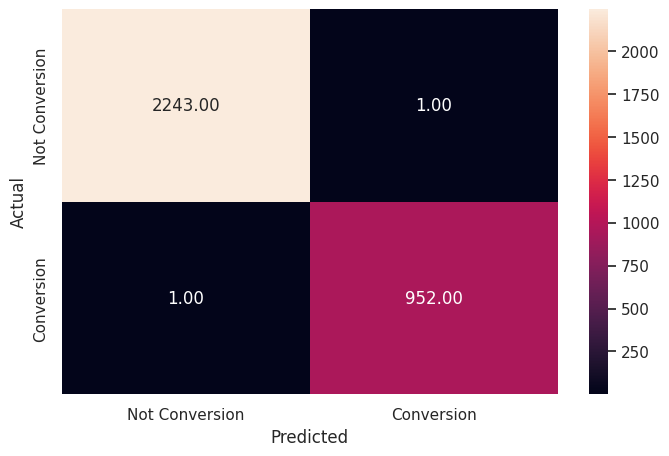

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

**Observations:**

- The tuned model is also slightly overfitting the training dataset.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       962
           1       0.78      0.73      0.75       409

    accuracy                           0.86      1371
   macro avg       0.83      0.82      0.82      1371
weighted avg       0.85      0.86      0.85      1371



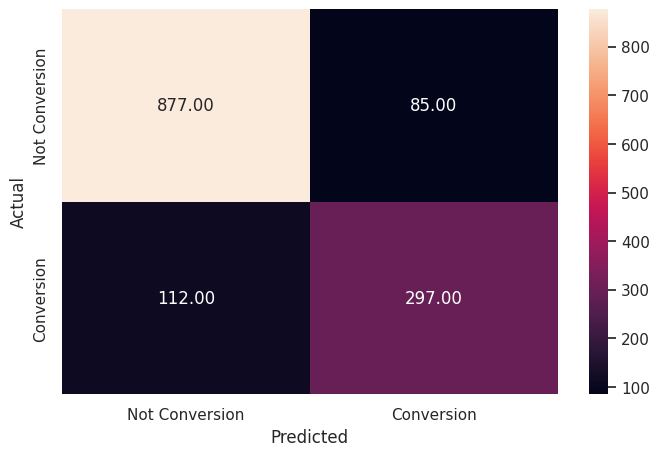

In [ ]:

# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- Even if the tuned model is slightly overfitting the training dataset, **it shows a good performance on the test dataset.**
- The significant boost in the recall score for class 1, reaching 0.73, implies that the **model has become more adept at correctly identifying a larger portion of leads who engage in online education (convert)**. Additionally, the rise in precision for both class 1 and class 0 suggests that the model has improved its capability to accurately categorize positive cases (leads who convert) and negative cases (leads who do not convert).

- **This model is the best-performing one among all the models so far,** and is giving us good precision and recall scores on the test dataset.

<Axes: xlabel='Importance'>

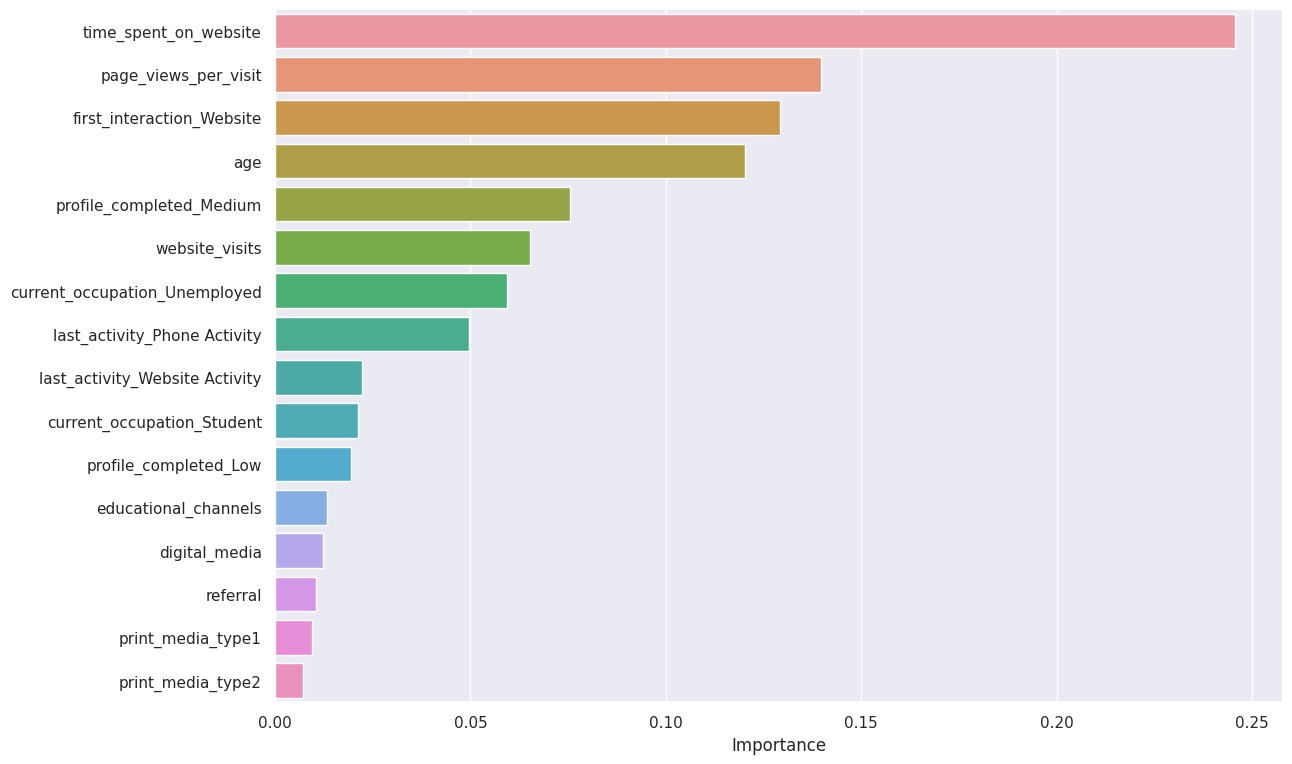

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 9))

sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

- The feature importance plot for the base model and tuned model are quite similar. The model seems to suggest that `time_spent_on_website`, `first_interaction_website`, `page_views_per_visit`and `age` are the most important features.


In [ ]:
df.time_spent_on_website

0       1639
1         83
2        330
3        464
5        212
        ... 
4607     360
4608    2327
4609     212
4610     154
4611    2290
Name: time_spent_on_website, Length: 4568, dtype: int64

## Actionable Insights and Recommendations

Conclude with the key takeaways in form of important features identified. - Provide Recommendations such that the business can take action upon them.

-  The most crucial feature for predicting whether a lead will convert (i.e., pay for online education) or not appears to be the **time spent on the website**. There is a positive correlation between the target variable and the amount of time spent on the website, indicating that when a lead spends more time on the website (measured in seconds), there is a higher likelihood that the lead will convert (status = 1).

- The initial interaction channels do influence the 'status' variable. **Leads who had their first interaction via the website are more inclined to convert** compared to those whose initial interaction occurred through the mobile app. The `first interaction Website` variable is regarded as one of the most significant features for predicting the 'status.'

- **Age is another crucial variable** for predicting whether a lead will convert or not. Despite the nearly negligible correlation with the target variable, our observation from the scatterplot reveals that the most frequent conversions occurred among leads aged between 50 and 60 years old.

- Regarding occupation, **professionals and the unemployed exhibit a strong inclination to invest in online education**, with 35% and 30% of them, respectively, choosing to pay for it. In contrast, students have a lower conversion rate of 10%.

-  There is no observed correlation between the **number of pages** visited by a lead and their status. This suggests that the number of pages a lead visits does not play a role in determining whether or not they will convert. However, it's worth noting that, according to feature importance analysis, the number of pages visited is still considered one of the most relevant factors for predicting status.

- Leads whose **last interaction was through email** have a higher conversion rate than Phone Activity	and Website Activity

- Leads who completed their profiles to a high degree have a greater likelihood of converting. For those with low completion levels, the conversion rate was merely 10%.

-  **The company gets leads from various channels, the highest lead conversion rate comes form the chanel : educational_channels**, then digital_media, after print_media_type1, and lastly: print_media_type2 and referral.

**In summary, the company should focus on leads with the following characteristics to improve conversion rates:**

- Leads who spend more time on the website.
- Leads whose initial interaction was through the website.
- Leads in the age group of 50 to 60.
- Professionals and the unemployed.
- Leads with a higher degree of profile completion.
- Leads acquired through "educational_channels," "digital_media," and "print_media_type1" channels.